In [37]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
directory = '../../cc3/rice_data/ecg_ppg_25_left4/'
yield_ecg = []
yield_ppg = []
for f in os.listdir(directory):
    if f[-1]!='p':
        continue
    data = pickle.load(open(directory+f,'rb'))[0]
    data_days = [df for i,df in data.groupby(['user','day'],as_index=False) if df.shape[0]>0]
    for df in data_days:
        if df['stress_likelihood_ppg'].dropna().shape[0]>0:
            yield_ppg.append(df['stress_likelihood_ppg'].dropna().shape[0])
        if df['stress_likelihood_ecg'].dropna().shape[0]>0:
            yield_ecg.append(df['stress_likelihood_ecg'].dropna().shape[0])

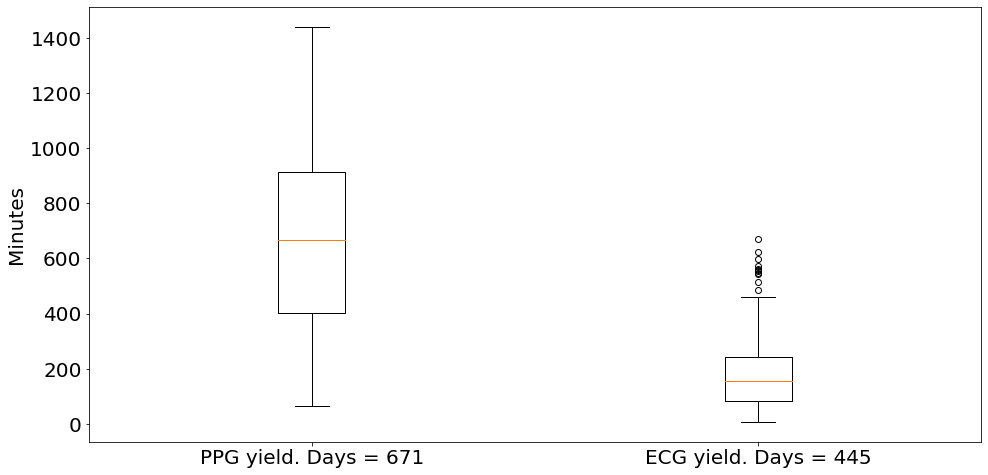

In [38]:
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(16,8))
plt.boxplot([yield_ppg,yield_ecg])
plt.xticks([1,2],['PPG yield. Days = '+str(len(yield_ppg)),'ECG yield. Days = '+str(len(yield_ecg))])
plt.ylabel('Minutes')
plt.show()

In [39]:
from sklearn.metrics import r2_score
directory = '../../cc3/rice_data/ecg_ppg_25_left4/'
all_scores = []
for f in os.listdir(directory):
    if f[-1]!='p':
        continue
    data = pickle.load(open(directory+f,'rb'))[0]
    data_days = [df[['stress_likelihood_ecg',
                     'stress_likelihood_ppg',
                     'stress_likelihood_ppg_qual']].dropna() for i,df in data.groupby(['user','day'],as_index=False) if df.shape[0]>0]
    scores = [np.array([r2_score(df['stress_likelihood_ecg'],df['stress_likelihood_ppg']), \
                        r2_score(df['stress_likelihood_ecg'],df['stress_likelihood_ppg_qual'])]) for df in data_days if df.shape[0]>60]
    all_scores.extend(scores)

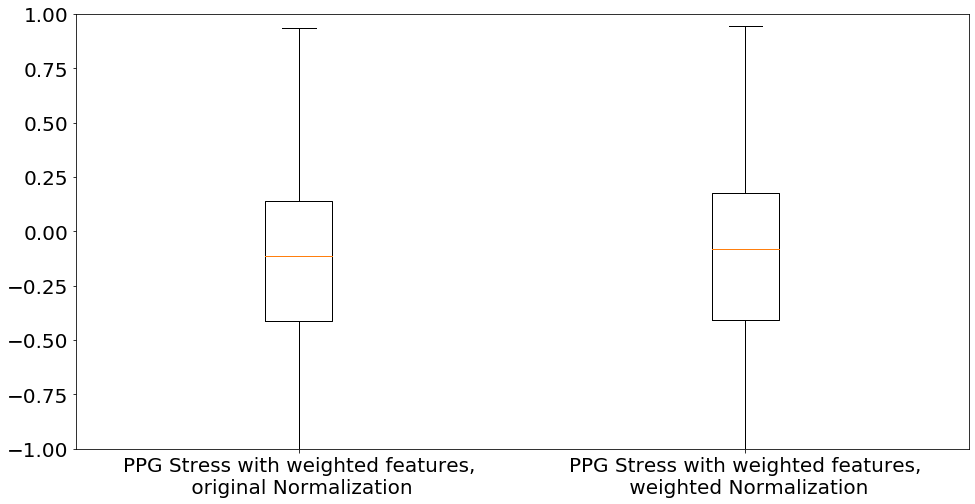

In [40]:
all_scores = np.array(all_scores)
plt.figure(figsize=(16,8))
plt.boxplot(all_scores)
plt.xticks([1,2],['PPG Stress with weighted features,\n original Normalization',
                 'PPG Stress with weighted features,\n weighted Normalization'])
plt.ylim([-1,1])
plt.show()

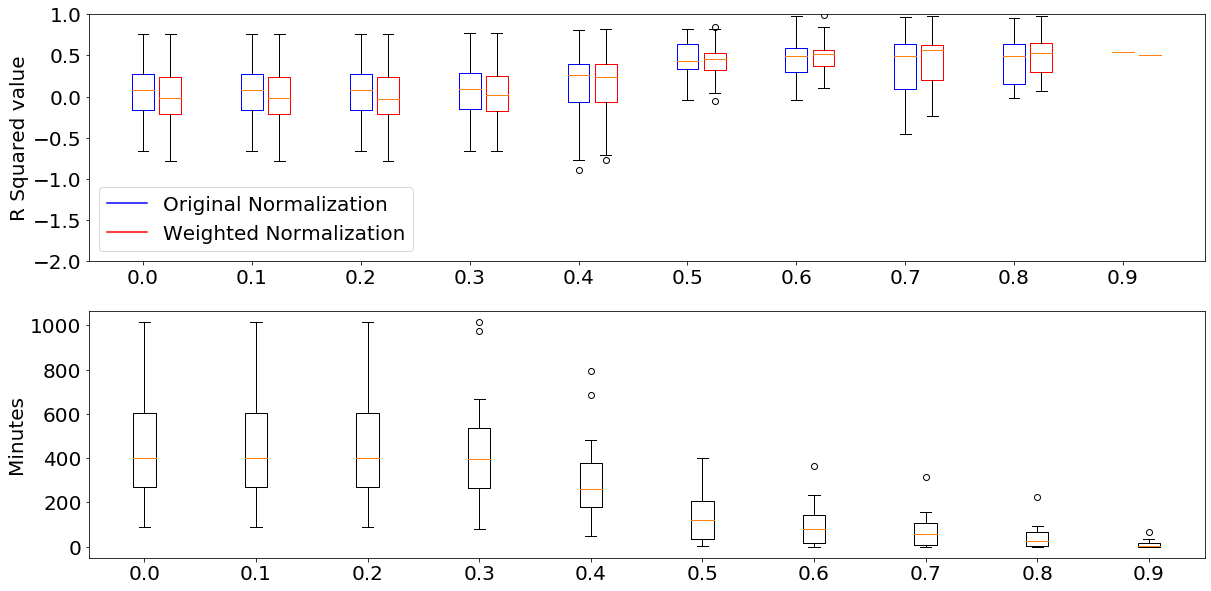

In [57]:
from sklearn.metrics import r2_score
import pickle
import numpy as np
directory = '../../cc3/rice_data/ecg_ppg_25_left4/'
all_scores_1 = []
all_scores_2 = []
all_yields = []
for k in np.arange(0,1,.1):
    all_scores = []
    yields = []
    for f in os.listdir(directory)[:2]:
        if f[-1]!='p':
            continue
        data = pickle.load(open(directory+f,'rb'))[0]
        data_days = [df[['stress_likelihood_ecg',
                         'stress_likelihood_ppg',
                         'stress_likelihood_ppg_qual',
                         'quality_mag']] for i,df in data.groupby(['user','day'],as_index=False) if df.shape[0]>0]
        yields.extend([df[df.quality_mag>=k]['stress_likelihood_ppg'].dropna().shape[0] for df in data_days])
        data_days = [a[a.quality_mag>=k].dropna() for a in data_days if a[a.quality_mag>=k].dropna().shape[0]>30]
        try:
            scores = [np.array([r2_score(df['stress_likelihood_ecg'],df['stress_likelihood_ppg']), \
                            r2_score(df['stress_likelihood_ecg'],df['stress_likelihood_ppg_qual'])]) for df in data_days]
        except:
            scores = [np.zeros(0,2)]
        all_scores.extend(scores)
    all_yields.append(np.array(yields))
    all_scores = np.array(all_scores)
    all_scores_1.append(list(all_scores[:,0]))
    all_scores_2.append(list(all_scores[:,1]))        

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
fig,ax1 = plt.subplots(2,1,figsize=(20,10))
ax1[1].boxplot(all_yields, positions = np.array(range(0,10,1)), widths = 0.2)
ax1[1].set_xticklabels([str(np.round(k*100)/100) for k in np.arange(0,1,.1)])
ax1[1].set_xticks(range(0,10,1))
ax1[1].set_ylabel('Minutes')
ax = ax1[0]
bp = ax.boxplot(all_scores_1, positions = np.array(range(1,11,1)), widths = 0.2)
for i in range(10):
    setp(bp['boxes'][i], color='blue')
# second boxplot pair
bp = ax.boxplot(all_scores_2, positions = np.array(range(1,11,1))+.25, widths = 0.2)
# setBoxColors(bp)
for i in range(10):
    setp(bp['boxes'][i], color='red')
ax.set_ylim(-2,1)
ax.set_xticklabels([str(np.round(k*100)/100) for k in np.arange(0,1,.1)])
ax.set_xticks(range(1,11,1))
ax.set_ylabel('R Squared value')
# draw temporary red and blue lines and use them to create a legend
hB, = plt.plot([1,1],'b-')
hR, = plt.plot([1,1],'r-')
ax.legend((hB, hR),('Original Normalization', 'Weighted Normalization'))
hB.set_visible(False)
hR.set_visible(False)
plt.show()

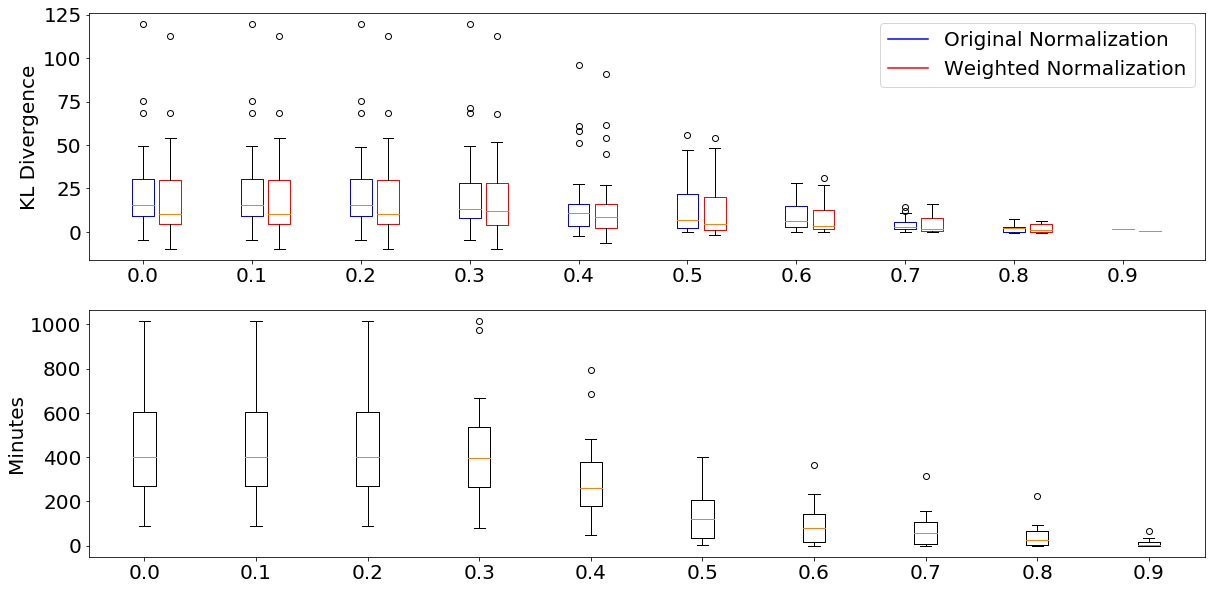

In [55]:
def KL(P,Q):
    """ Epsilon is used here to avoid conditional code for
    checking that neither P nor Q is equal to 0. """
    epsilon = 0.00001

     # You may want to instead make copies to avoid changing the np arrays.
    P = P+epsilon
    Q = Q+epsilon

    divergence = np.sum(P*np.log(P/Q))
    return divergence
from sklearn.metrics import r2_score
import pickle
import numpy as np
directory = '../../cc3/rice_data/ecg_ppg_25_left4/'
all_scores_1 = []
all_scores_2 = []
all_yields = []
for k in np.arange(0,1,.1):
    all_scores = []
    yields = []
    for f in os.listdir(directory)[:2]:
        if f[-1]!='p':
            continue
        data = pickle.load(open(directory+f,'rb'))[0]
        data_days = [df[['stress_likelihood_ecg',
                         'stress_likelihood_ppg',
                         'stress_likelihood_ppg_qual',
                         'quality_mag']] for i,df in data.groupby(['user','day'],as_index=False) if df.shape[0]>0]
        yields.extend([df[df.quality_mag>=k]['stress_likelihood_ppg'].dropna().shape[0] for df in data_days])
        data_days = [a[a.quality_mag>=k].dropna() for a in data_days if a[a.quality_mag>=k].dropna().shape[0]>30]
        try:
            scores = [np.array([KL(df['stress_likelihood_ecg'],df['stress_likelihood_ppg']), \
                            KL(df['stress_likelihood_ecg'],df['stress_likelihood_ppg_qual'])]) for df in data_days]
        except:
            scores = [np.zeros(0,2)]
        all_scores.extend(scores)
    all_yields.append(np.array(yields))
    all_scores = np.array(all_scores)
    all_scores_1.append(list(all_scores[:,0]))
    all_scores_2.append(list(all_scores[:,1]))        

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
fig,ax1 = plt.subplots(2,1,figsize=(20,10))
ax1[1].boxplot(all_yields, positions = np.array(range(0,10,1)), widths = 0.2)
ax1[1].set_xticklabels([str(np.round(k*100)/100) for k in np.arange(0,1,.1)])
ax1[1].set_xticks(range(0,10,1))
ax1[1].set_ylabel('Minutes')
ax = ax1[0]
bp = ax.boxplot(all_scores_1, positions = np.array(range(1,11,1)), widths = 0.2)
for i in range(10):
    setp(bp['boxes'][i], color='blue')
bp = ax.boxplot(all_scores_2, positions = np.array(range(1,11,1))+.25, widths = 0.2)
for i in range(10):
    setp(bp['boxes'][i], color='red')
ax.set_xticklabels([str(np.round(k*100)/100) for k in np.arange(0,1,.1)])
ax.set_xticks(range(1,11,1))
ax.set_ylabel('KL Divergence')
hB, = plt.plot([1,1],'b-')
hR, = plt.plot([1,1],'r-')
ax.legend((hB, hR),('Original Normalization', 'Weighted Normalization'))
hB.set_visible(False)
hR.set_visible(False)
plt.show()

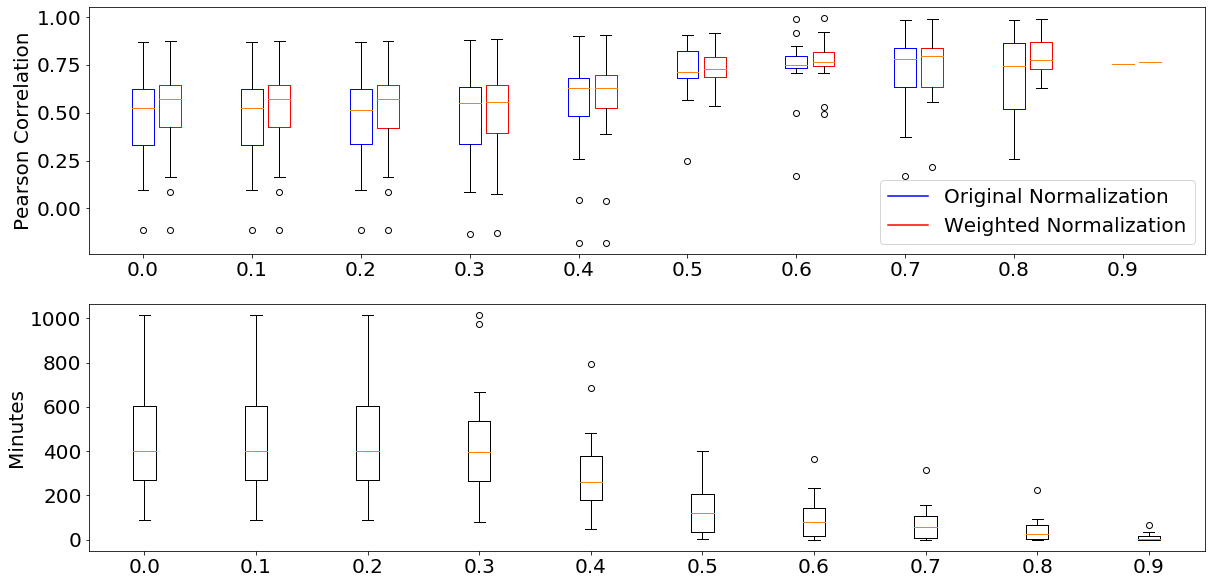

In [58]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import pickle
import numpy as np
directory = '../../cc3/rice_data/ecg_ppg_25_left4/'
all_scores_1 = []
all_scores_2 = []
all_yields = []
for k in np.arange(0,1,.1):
    all_scores = []
    yields = []
    for f in os.listdir(directory)[:2]:
        if f[-1]!='p':
            continue
        data = pickle.load(open(directory+f,'rb'))[0]
        data_days = [df[['stress_likelihood_ecg',
                         'stress_likelihood_ppg',
                         'stress_likelihood_ppg_qual',
                         'quality_mag']] for i,df in data.groupby(['user','day'],as_index=False) if df.shape[0]>0]
        yields.extend([df[df.quality_mag>=k]['stress_likelihood_ppg'].dropna().shape[0] for df in data_days])
        data_days = [a[a.quality_mag>=k].dropna() for a in data_days if a[a.quality_mag>=k].dropna().shape[0]>30]
        try:
            scores = [np.array([pearsonr(df['stress_likelihood_ecg'],df['stress_likelihood_ppg'])[0], \
                            pearsonr(df['stress_likelihood_ecg'],df['stress_likelihood_ppg_qual'])[0]]) for df in data_days]
        except:
            scores = [np.zeros(0,2)]
        all_scores.extend(scores)
    all_yields.append(np.array(yields))
    all_scores = np.array(all_scores)
    all_scores_1.append(list(all_scores[:,0]))
    all_scores_2.append(list(all_scores[:,1]))        

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
fig,ax1 = plt.subplots(2,1,figsize=(20,10))
ax1[1].boxplot(all_yields, positions = np.array(range(0,10,1)), widths = 0.2)
ax1[1].set_xticklabels([str(np.round(k*100)/100) for k in np.arange(0,1,.1)])
ax1[1].set_xticks(range(0,10,1))
ax1[1].set_ylabel('Minutes')
ax = ax1[0]
bp = ax.boxplot(all_scores_1, positions = np.array(range(1,11,1)), widths = 0.2)
for i in range(10):
    setp(bp['boxes'][i], color='blue')
bp = ax.boxplot(all_scores_2, positions = np.array(range(1,11,1))+.25, widths = 0.2)
for i in range(10):
    setp(bp['boxes'][i], color='red')
ax.set_xticklabels([str(np.round(k*100)/100) for k in np.arange(0,1,.1)])
ax.set_xticks(range(1,11,1))
ax.set_ylabel('Pearson Correlation')
hB, = plt.plot([1,1],'b-')
hR, = plt.plot([1,1],'r-')
ax.legend((hB, hR),('Original Normalization', 'Weighted Normalization'))
hB.set_visible(False)
hR.set_visible(False)
plt.show()